<a href="https://colab.research.google.com/github/BYRic-F/E-commerce-Fraud-detection/blob/main/Vesta%20E-commerce_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries for import files
from google.colab import files
import zipfile

#import libraries for Eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import and unzip dataset from Kaggle
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-fraud-detection --force

with zipfile.ZipFile("ieee-fraud-detection.zip", "r") as zip_ref:
    zip_ref.extractall("ieee_fraud")



Saving kaggle.json to kaggle.json
 81% 96.0M/118M [00:00<00:00, 1.00GB/s]
100% 118M/118M [00:00<00:00, 966MB/s]  


In [3]:
# Load dataset transaction

train_transaction = pd.read_csv("ieee_fraud/train_transaction.csv")
test_transaction = pd.read_csv("ieee_fraud/test_transaction.csv")

train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Load dataset identity

train_identity = pd.read_csv("ieee_fraud/train_identity.csv")
test_identity = pd.read_csv("ieee_fraud/test_identity.csv")

train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_identity.shape

(144233, 41)

In [6]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
train_transaction.shape

(590540, 394)

In [8]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

I want to merge the 2 datasets. However, we don't have the same number of lines.

On closer inspection, we notice that some TransactionID are missing from the train_identity dataset. So we'll have to do a left merge to avoid losing any data.

In [9]:
# Merge the two datasets using a left merge on 'TransactionID'
train= pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
train.head()

test= pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

I Check if I have all rows

In [10]:
print(f"Before merge on train : {train_transaction.shape[0]} transactions")
print(f"After merge on train : {train.shape[0]} transactions")


print(f"Before merge on test : {test_transaction.shape[0]} transactions")
print(f"After merge on test : {test.shape[0]} transactions")


del train_transaction, train_identity, test_transaction, test_identity





Before merge on train : 590540 transactions
After merge on train : 590540 transactions
Before merge on test : 506691 transactions
After merge on test : 506691 transactions


# I) <u> EDA </u>

We'll now explore the dataset.

We have a dataset that identifies fraudulent transactions according to various criteria.
The main difficulty is that the data has been anonymized.
After various searches, I was able to find out what the different columns correspond to.
My main source was https://www.kaggle.com/competitions/ieee-fraud-detection/discussion/101203.

#### <u> Transaction Table </u>
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

- TransactionAMT: transaction payment amount in USD

- ProductCD: product code, the product for each transaction

- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

- addr: address, addr1 as billing region and addr2 as billing country

- dist: distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.

- P_ and (R__) emaildomain: purchaser and recipient email domain

- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

- D1-D15: timedelta, such as days between previous transaction, etc.

- M1-M9: match, such as names on card and address, etc.

- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

##### <u>Categorical Features </u>
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

#### <u>Identity Table</u>

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.

##### <u>Categorical Features </u>
- DeviceType
- DeviceInfo
- id_12 - id_38


I notice a large amount of NaN in the dataset.
We'll start by analyzing the missing values.

#### a) Missing Values

In [11]:
missing_values = train.isnull().mean() * 100  # In percent
missing_values = missing_values[missing_values > 0] #  We keep only missing values
missing_values.sort_values(ascending=False)

,0
id_24,99.196159
id_25,99.130965
id_07,99.127070
id_08,99.127070
id_21,99.126393
...,...
V309,0.002032
V312,0.002032
V311,0.002032
V310,0.002032


Some columns contain many missing values.

Now I'm going to look at the proportion of fraud on the dataset.

#### b) Is Fraud?

3.5 % of transactions are fraudulent


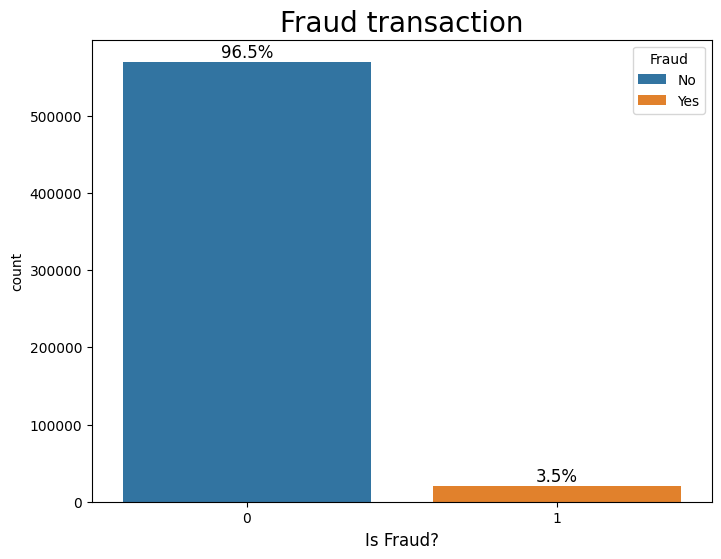

In [43]:
#Percentage of frauds

percentage_frauds = train['isFraud'].value_counts(normalize=True)*100

print(percentage_frauds[1].round(2),'% of transactions are fraudulent')

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train, x='isFraud', hue= 'isFraud')
plt.title("Fraud transaction", fontsize='20')
plt.xlabel("Is Fraud?", fontsize=12)
plt.legend(title="Fraud", labels=["No", "Yes"])


total = len(train)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      percentage = f'{100 * height / total:.1f}%'
      # Adjust vertical position of annotation
      ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height + 1000),  # Add vertical offset
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

We have 3.5% of Fraud transactions in our dataset.

Now, we'll explore the transaction amount.

#### c) Transaction amounts


In [44]:
print(train.groupby("isFraud")["TransactionAmt"].describe())

            count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000  


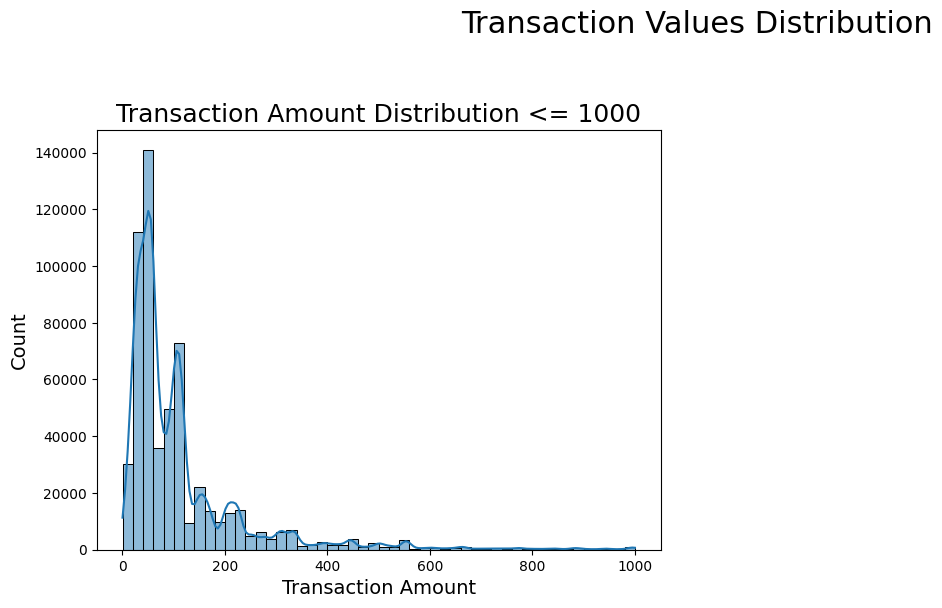

In [61]:
plt.figure(figsize=(16, 12))
plt.suptitle('Transaction Values Distribution', fontsize=22)

# Add a subgraph for transaction amounts <= 1000
plt.subplot(221)
g = sns.histplot(train[train['TransactionAmt'] <= 1000]['TransactionAmt'], kde=True, bins=50,)

g.set_title("Transaction Amount Distribution <= 1000", fontsize=18)
g.set_xlabel("Transaction Amount", fontsize=14)
g.set_ylabel("Count", fontsize=14)


plt.show()